## How to Fit a Hill Equation to Data (basics) 
@PauloCaldas 2019, Jul // https://github.com/paulocaldas/How-to-Python

**Basics**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

**Import Data**

In [2]:
spatial_order = pd.read_csv('data_examples/order titration.txt', sep = '\t')

**Organize Data**

In [3]:
x_axis = spatial_order['ZapA']
y_axis = spatial_order['Corr_Len']
errors = spatial_order['Stdev']

**Plot Data**

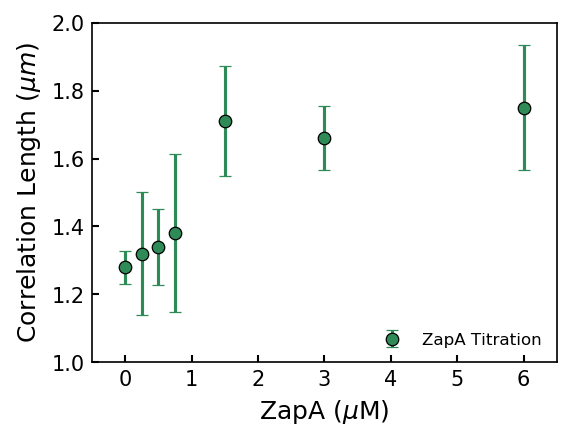

In [6]:
fig,ax = plt.subplots(figsize=(4, 3), dpi = 150)

# plot_kwargs defines my favorite plot settings and then I can use them for multiple plots

plot_kwargs = {'fmt': 'o', 'lw':1,'capsize': 3, 'capthick':6, 'elinewidth':1.5, 'markersize':6,
               'markeredgecolor':'black', 'markeredgewidth':0.6, 'clip_on':False}

plt.errorbar(x_axis,y_axis, yerr = errors, **plot_kwargs, color = 'seagreen', label = 'ZapA Titration')

#make the plot pretty
plt.xlabel('ZapA ($\mu$M)', fontsize=12)
plt.ylabel('Correlation Length ($\mu m$)', fontsize=12)
plt.legend(loc = 4, frameon=False, fontsize = 8)
plt.tick_params(top=False, right=False)
plt.xlim([-0.5,6.5]);
plt.ylim([1,2]);
plt.tick_params(direction = 'in', top=False, right=False, width = 1)

**Define Hill Equation Function to fit the Data**

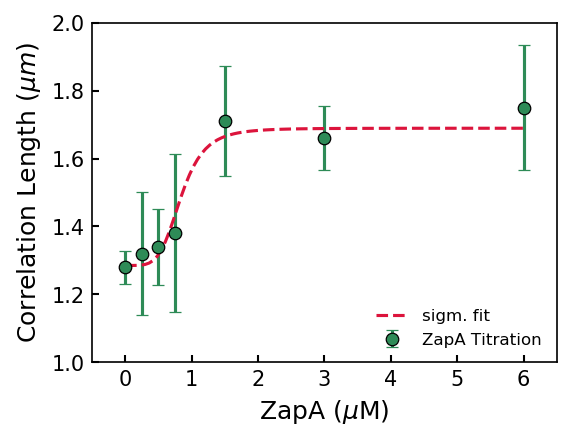

In [8]:
def Hill_Equation_Fit (x, n, k, start, end):                        
    return start + (end-start)*(( x**n ) / ( (k**n) + (x**n)))

initial_guess = [4,1,2,2]
param, cov = curve_fit(Hill_Equation_Fit, x_axis, y_axis, sigma = errors, p0 = initial_guess)

# param contains all the fitting parameters, we can unpack them like this:
n, k, start, end = param

# create a x-axis vector to plot the new data
x_values_to_fit = np.linspace(0,6,100)

fig,ax = plt.subplots(figsize=(4, 3), dpi = 150)
plt.errorbar(x_axis,y_axis, yerr = errors, **plot_kwargs, color = 'seagreen', label = 'ZapA Titration')
plt.plot(x_values_to_fit, Hill_Equation_Fit(x_values_to_fit, *param), '--', c ='crimson', label='sigm. fit')

#make the plot pretty
plt.xlabel('ZapA ($\mu$M)', fontsize=12)
plt.ylabel('Correlation Length ($\mu m$)', fontsize=12)
plt.legend(loc = 4, frameon=False, fontsize = 8)
plt.tick_params(top=False, right=False)
plt.xlim([-0.5,6.5]);
plt.ylim([1,2]);
plt.tick_params(direction = 'in', top=False, right=False, width = 1)

# Save final figure
plt.savefig('plot_examples/hitt_equation_fit_example_plot.png', bbox_inches = 'tight')